In [61]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [15, 5]

In [62]:
%load_ext autoreload
%autoreload 2
%run '../../main.py'


from lib.helper import Functions
from lib.store.influxstore import InfluxStore

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
dataSetOps = DataSetOps()

dataSetOps.import_years(2018, 2018)
dataSetOps.prepareMin()

df = dataSetOps.df

df = df.head(30000)


In [126]:
def integ_calc(arr):
    begin = arr[0]
    td = len(arr)
    end = arr[td-1]
    
    s = 0
    for i in range(0, td):
        cp = begin + ((end - begin) * i / td)
        incp = arr[i] - cp
        s = s + incp
    return s

# def integral(df, size):
#     df['integral_' + str(size)] = df['price'].rolling(window=size).apply(integ_calc)

# def norm_integral(df, size):
#     df['']

# for i in range(1, 20):
#     integral(df, i * 10)

levels = [3, 2, 1, 0.5, 0.3, 0.2, 0.1, 0.05]

allowed_windowes = [10, 20, 30, 40, 50, 70, 100]
i = allowed_windowes[0]
integList = [0] * len(df)
integRoList = [0] * len(df)
for minLevel in levels:
    print('level:', minLevel)
    i = allowed_windowes[0]
    while i < len(df) - 1:
        maxs = 0;
        maxro = 0
        maxws = 0
        for ws in allowed_windowes:
            begin = int(i - ws/2)
            end = int(i + ws/2)
            if (begin < 0) or (end > len(df) - 1):
                continue

            s = integ_calc(df.iloc[begin:end]['price'].values)
            ro = s / ws
            if abs(ro) * 1000 < minLevel:
                continue
            if abs(ro) > maxro:
                maxs = s
                maxro = ro
                maxws = ws
        begin = int(i - maxws/2)
        end = int(i + maxws/2)

        if (begin < 0) or (end > len(df) - 1):
            continue
        if maxro == 0:
            i = i + allowed_windowes[0]
            continue

        print(i, maxs, maxws)
        for j in range(begin, end):
    #         print(j)
            if integList[j] != 0:
                break;
            integList[j] = maxs
            integRoList[j] = maxro
        i = end
df['integral'] = integList
df['integralRo'] = integRoList
df['integralRo'] = df['integralRo'] * 1000

level: 3
25380 -0.2227100000000024 70
25415 0.1701400000000035 50
25690 0.34260999999999053 100
25740 -0.3277149999999973 100
level: 2
9340 -0.22865499999999717 100
9400 0.10198999999999869 50
10885 -0.20018500000000983 100
10975 0.2063850000000007 100
14905 0.08228000000000124 40
20105 -0.1415349999999982 70
25350 -0.2714000000000045 100
25400 0.14901500000000434 70
25435 0.2978749999999959 100
25675 0.20233999999999952 100
25735 -0.24614999999999676 100
25785 0.08162499999999828 40
25815 0.20276999999999323 100
29395 -0.147299999999998 70
level: 1
3910 0.11590499999999948 100
5200 -0.12311999999999967 100
5250 0.08368499999999734 70
5285 -0.08157500000000018 70
9330 -0.10629499999999736 100
9390 0.08146499999999768 70
9425 0.18057000000000123 100
9475 0.1428350000000005 100
9575 0.12700500000000448 100
9675 0.10928499999999786 100
9845 0.12124499999999738 100
10885 -0.20018500000000983 100
10955 0.12665999999999977 70
11590 -0.1141049999999959 100
11650 0.10186500000000343 100
12090 

17810 -0.0778650000000054 100
17860 0.033024999999999194 50
17885 0.06978000000000995 70
17920 -0.04134500000000263 50
17945 -0.07235999999999754 100
18095 0.08191000000000237 100
18165 -0.07434000000000918 100
18235 -0.026955000000002505 50
18260 0.08245999999999598 100
18310 -0.08715000000000783 100
18360 0.013619999999999965 20
18370 0.030320000000001457 40
18390 0.08259500000001463 100
18440 -0.025504999999995004 40
18460 -0.054789999999986794 100
18510 -0.07381999999999511 100
18560 0.06553500000000634 100
18610 -0.05438999999999261 70
18805 -0.04844500000000185 70
18840 0.027924999999994427 50
18895 -0.08542000000000427 100
18945 0.043504999999996796 70
18990 -0.08064499999999786 100
19040 0.04490999999999956 70
19225 -0.05964499999999773 100
19275 0.03259500000000126 50
19300 -0.029300000000004767 50
19335 0.04875999999999814 70
19370 -0.022869999999999058 40
19410 0.0644899999999955 100
19490 0.027429999999995847 50
19515 -0.032899999999996155 40
19555 -0.02478499999999917 40
1

5045 0.010945000000000427 30
5070 -0.01598000000000499 50
5175 -0.02389999999999981 50
5200 -0.12311999999999967 100
5250 0.08368499999999734 70
5285 0.037954999999992634 100
5335 0.02761999999999798 70
5370 -0.03343000000000318 50
5395 -0.05658500000000366 100
5445 -0.03793000000000313 100
5505 0.02189000000000041 70
5620 0.034470000000005996 100
5740 -0.03186999999998785 70
5775 0.012614999999995824 40
5895 -0.03873499999999597 100
5945 0.02909000000000206 70
5980 0.04191499999999615 100
6030 -0.025584999999997304 70
6085 0.034610000000002694 100
6175 0.02823500000000201 70
6210 -0.02194499999999655 70
6245 0.016800000000001702 50
6280 0.04335000000000355 100
6340 -0.015899999999998915 50
6365 -0.048690000000000566 100
6415 -0.039980000000004345 100
6465 -0.04677499999999357 100
6515 0.07978500000000621 100
6565 -0.04163499999999365 100
6615 0.02217499999999939 40
6645 -0.044640000000002455 70
6720 0.034714999999994944 100
6770 -0.037674999999997905 100
6830 0.026084999999999026 70
6

20955 0.030554999999989008 100
21015 -0.038710000000001354 100
21065 -0.04980000000000118 100
21115 0.038669999999990434 100
21165 -0.05983499999999209 100
21215 0.09210000000000318 100
21265 -0.044530000000008396 100
21315 -0.058610000000005824 100
21475 0.030730000000003033 100
21675 -0.04329499999999231 100
21735 0.01932999999999807 40
21755 0.04280500000000109 100
21805 0.035349999999994 70
21840 -0.07117000000001106 100
21890 0.023930000000004892 70
21935 -0.012165000000001314 40
21965 0.01245000000000207 40
22005 -0.03163000000000893 100
22055 0.022845000000001114 70
22090 0.033870000000004286 50
22115 -0.04681999999999786 70
22150 0.03576999999999586 70
22195 -0.04121999999999515 70
22230 -0.0854150000000049 100
22300 0.03729499999999453 70
22335 -0.03808499999999704 70
22370 0.017324999999999813 30
22385 0.049265000000003 70
22420 -0.07607500000000122 100
22480 -0.011905000000000943 30
22495 0.0608299999999955 100
22545 -0.046215000000004114 100
22595 0.018869999999999054 30
22

2970 0.01582499999999598 70
3005 -0.03417500000000251 100
3065 0.0060300000000035325 30
3080 -0.004154999999999465 20
3090 -0.03172500000000422 100
3140 0.0046949999999985614 20
3150 0.023354999999995574 70
3215 -0.024050000000010785 100
3305 -0.018959999999997645 70
3340 -0.029650000000010168 100
3390 0.03783999999999743 70
3425 -0.008250000000001645 40
3445 0.019759999999991118 70
3480 0.028014999999989243 100
3530 -0.010189999999999921 40
3550 -0.03868499999999875 100
3600 0.016729999999999023 40
3620 0.044060000000007316 100
3670 0.022209999999989405 100
3720 0.017754999999996413 70
3755 0.01965000000000572 70
3790 -0.02470500000000464 70
3825 -0.0714000000000028 100
3875 0.012854999999998729 30
3890 0.028269999999996687 50
3915 0.10769000000000384 100
3965 -0.013704999999999856 30
3980 -0.006504999999997985 30
3995 -0.05560999999999483 100
4045 -0.036490000000003686 100
4095 0.028399999999999537 70
4130 -0.05933000000000588 100
4180 0.03867500000000246 100
4230 -0.0173950000000018

14775 0.03144500000001371 100
14845 -0.06630000000000114 100
14895 0.1351500000000032 70
14930 -0.0612699999999986 100
14980 0.16584000000000754 100
15030 -0.03359499999999915 100
15080 -0.023800000000005817 70
15115 0.08157500000000217 100
15165 -0.053995000000006454 100
15215 0.01225999999999794 50
15240 0.059299999999996356 100
15290 0.0788499999999932 100
15340 -0.06702999999999881 100
15390 -0.03128500000000223 100
15440 0.04183499999999474 100
15490 0.020314999999994976 100
15540 0.025275000000006376 100
15590 -0.03968499999999886 100
15640 0.06783999999998991 100
15690 0.039754999999993546 100
15740 0.016295000000007054 70
15785 -0.02544499999999883 100
15835 -0.02116500000000099 100
15885 -0.024040000000006945 100
15935 -0.1619850000000056 100
15985 0.02536999999999834 20
15995 0.08765999999999785 50
16020 0.16217499999999907 100
16070 0.06302499999999589 100
16120 -0.04867500000001157 100
16170 0.013729999999998466 30
16185 0.06478500000000209 100
16235 -0.030000000000000693 5

28705 -0.023964999999990244 100
28775 0.014604999999997537 70
28820 -0.010549999999999171 50
28845 0.01940000000000186 70
28880 0.02122000000000379 70
28915 -0.024629999999988383 100
28965 -0.01596499999999934 70
29000 0.06747499999999174 100
29050 -0.06391999999999709 100
29100 0.024620000000004305 100
29150 0.05053500000000266 100
29200 -0.011860000000001314 40
29220 0.02640499999999979 50
29245 -0.002355000000000107 10
29250 0.037334999999995455 100
29300 -0.05596000000000423 100
29350 0.057305000000002604 50
29375 -0.052779999999999605 100
29425 0.036879999999998025 70
29460 0.03142999999999496 70
29495 0.009120000000000239 40
29515 0.050759999999997696 70
29550 0.04152500000000159 100
29600 0.09555499999999895 100
29650 -0.039405000000003465 100
29700 -0.05750499999999814 70
29735 0.01395500000000105 20
29745 0.07858999999999816 100
29795 0.022084999999997468 40
29815 -0.031060000000003862 100
29865 0.02818999999999905 40
29885 -0.052704999999990676 100
29935 0.07037500000000274 1

12715 -0.015045000000002196 70
12750 0.024480000000005164 100
12800 0.04525500000000049 100
12850 -0.023225000000000495 100
12900 0.0375049999999979 50
12925 0.05098499999999451 100
12975 0.04526499999999212 100
13025 0.016519999999992985 70
13060 0.012844999999998219 70
13095 -0.055875000000003894 100
13145 0.028665000000008156 50
13170 0.07575000000001242 100
13220 -0.014120000000003463 100
13270 0.027635000000002075 100
13320 -0.028420000000008994 100
13370 0.03819500000000908 100
13420 0.08780000000001009 100
13470 -0.051644999999995944 70
13505 -0.0682899999999913 100
13555 -0.09392000000000356 100
13605 -0.05357000000000256 100
13655 0.010775000000001311 20
13665 0.03962500000000291 100
13715 0.11647500000000233 100
13765 -0.03901499999999114 100
13815 -0.05331999999999715 100
13865 0.04462500000000458 70
13900 0.04083999999999555 50
13925 0.11111999999999278 100
13975 -0.07547499999999907 100
14025 0.028070000000000705 50
14050 0.007195000000001173 70
14085 -0.041539999999999466

28250 0.006979999999998876 40
28270 0.018960000000005195 100
28320 -0.04249500000001394 100
28370 0.05381500000000172 100
28420 -0.03739000000000803 100
28470 -0.08438499999999927 100
28520 0.025904999999992295 70
28555 0.008289999999999909 70
28590 -0.025500000000002077 100
28640 0.025114999999997334 100
28690 0.002154999999999463 10
28695 0.0030049999999990362 20
28705 -0.023964999999990244 100
28755 -0.008469999999996647 70
28790 0.004555000000000087 30
28805 -0.002640000000000864 20
28815 -0.010484999999997635 50
28840 0.00946000000000291 70
28875 0.024735000000003504 70
28910 -0.04828999999999861 100
28960 -0.02274999999999827 100
29010 0.058859999999997026 70
29045 -0.05967999999999929 100
29105 0.07601500000000283 100
29155 0.03313499999999969 100
29205 0.026565000000000394 100
29255 0.016834999999994604 100
29305 -0.05379500000000492 100
29355 0.04234999999999922 40
29375 -0.052779999999999605 100
29425 0.036879999999998025 70
29460 0.03142999999999496 70
29495 0.00912000000000

13555 -0.09392000000000356 100
13605 -0.05357000000000256 100
13655 0.010775000000001311 20
13665 0.03962500000000291 100
13715 0.11647500000000233 100
13765 -0.03901499999999114 100
13815 -0.05331999999999715 100
13865 0.04462500000000458 70
13900 0.04083999999999555 50
13925 0.11111999999999278 100
13975 -0.07547499999999907 100
14025 0.028070000000000705 50
14050 0.007195000000001173 70
14085 -0.041539999999999466 100
14135 0.012610000000001564 30
14150 0.028419999999994783 100
14200 0.04063999999999113 100
14250 -0.005360000000002474 100
14300 0.014085000000003012 100
14350 -0.009039999999998605 70
14385 -0.01031499999999741 100
14435 -0.010630000000001472 70
14470 0.016949999999998244 40
14490 0.040080000000003446 100
14540 0.028489999999999682 70
14575 -0.04611500000000013 100
14625 0.05924499999999555 100
14675 0.07190500000001099 100
14725 -0.04294000000000131 100
14775 0.03144500000001371 100
14825 0.012704999999997746 70
14860 -0.022264999999999757 100
14910 0.037930000000000

29045 -0.05967999999999929 100
29095 -0.0021049999999986913 30
29110 0.03728499999999846 100
29160 0.01855500000000032 70
29195 0.005694999999997785 70
29230 0.02128500000000355 70
29265 -0.007549999999992618 100
29315 -0.02517499999999462 100
29365 0.008780000000000232 20
29375 -0.052779999999999605 100
29425 0.036879999999998025 70
29460 0.03142999999999496 70
29495 0.009120000000000239 40
29515 0.050759999999997696 70
29550 0.04152500000000159 100
29600 0.09555499999999895 100
29650 -0.039405000000003465 100
29700 0.00939000000000112 100
29750 0.06138000000000243 50
29775 0.11741500000000116 100
29825 0.07923999999998976 100
29875 -0.0822700000000054 100
29925 0.014500000000002844 40
29945 0.11474499999999876 100


/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

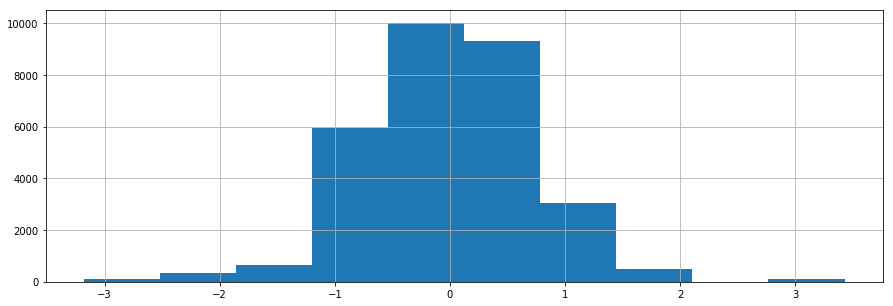

In [122]:
df['integralRo'].hist()

/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [124]:
size = 1000
# df[['price']].head(size).plot()
# df[['intg']].head(size).plot()
store = InfluxStore()
dfr = df[['time', 'integral']]
dfr = dfr[dfr['integral'] != 0]
store.storeDf(dfr, 'integral-class', 8)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000


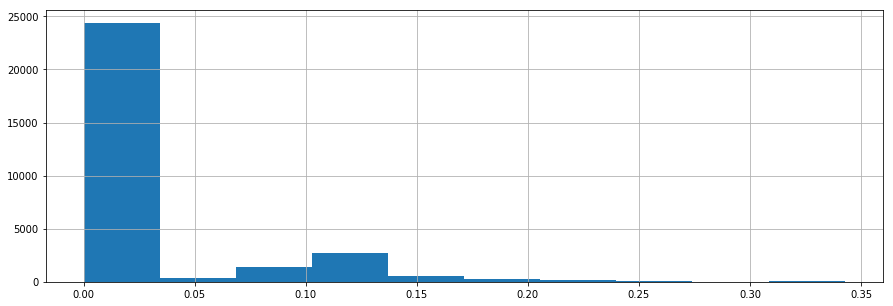

In [112]:
df['integral'].hist()